## Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [4]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

## Data Cleaning

In [5]:
df=pd.read_csv('/content/drive/MyDrive/ISM PROJ/Datasets/train.csv')

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
df.dropna(inplace=True)

In [10]:
df.reset_index(inplace=True)

In [11]:
df.shape

(18285, 6)

In [12]:
X=df.drop('label',axis=1)

In [13]:
y=df['label']

In [14]:
X.head()

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [15]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [16]:
X.reset_index(inplace=True)

## Text Preprocessing

In [17]:
messages = df.copy()

In [18]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [19]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [20]:
ps = PorterStemmer()
input_data = []
for i in messages.index:
    text = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    text = text.lower()
    text = text.split()
    
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    input_data.append(text)

In [21]:
input_data[0]

'hous dem aid even see comey letter jason chaffetz tweet'

## Count Vectorization

In [22]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,5))
# X = cv.fit_transform(input_data).toarray()
t1 = cv.fit(input_data)
X = t1.transform(input_data).toarray()

In [23]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
for i in range(len(X[0])):
    if X[0][i] == 1:
        print(i,X[0][i],cv.get_feature_names()[i])

92 1 aid
637 1 chaffetz
808 1 comey
810 1 comey letter
1089 1 dem
1433 1 even
2046 1 hous
2226 1 jason
2227 1 jason chaffetz
2450 1 letter
3854 1 see
4601 1 tweet


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'abus new york time',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'act new york time',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advis new york time',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'aftermath',
 'ag',
 'age',
 'age new',
 'age new york',
 'age n

In [26]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 5),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [27]:
count = pd.DataFrame(X, columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
pd.set_option('display.max_columns', None)

In [29]:
count.head()

abandon  abc  abc news  abduct  abe  abedin  abl  abort  abroad  absolut  \
0        0    0         0       0    0       0    0      0       0        0   
1        0    0         0       0    0       0    0      0       0        0   
2        0    0         0       0    0       0    0      0       0        0   
3        0    0         0       0    0       0    0      0       0        0   
4        0    0         0       0    0       0    0      0       0        0   

   absurd  abus  abus new  abus new york  abus new york time  accept  access  \
0       0     0         0              0                   0       0       0   
1       0     0         0              0                   0       0       0   
2       0     0         0              0                   0       0       0   
3       0     0         0              0                   0       0       0   
4       0     0         0              0                   0       0       0   

   access pipelin  access pipelin protest  accid  accident  accord  account  \
0               0                       0      0         0       0        0   
1               0                       0      0         0       0        0   
2               0                       0      0         0       0        0   
3               0                       0      0         0       0        0   
4               0                       0      0         0       0        0   

   accus  accus trump  achiev  acknowledg  acknowledg emf  \
0      0            0       0           0               0   
1      0            0       0           0               0   
2      0            0       0           0               0   
3      0            0       0           0               0   
4      0            0       0           0               0   

   acknowledg emf damag  aclu  acquit  acquitt  acr  across  act  act like  \
0                     0     0       0        0    0       0    0         0   
1                     0     0       0        0    0       0    0         0   
2                     0     0       0        0    0       0    0         0   
3                     0     0       0        0    0       0    0         0   
4                     0     0       0        0    0       0    0         0   

   act new  act new york  act new york time  action  activ  activist  actor  \
0        0             0                  0       0      0         0      0   
1        0             0                  0       0      0         0      0   
2        0             0                  0       0      0         0      0   
3        0             0                  0       0      0         0      0   
4        0             0                  0       0      0         0      0   

   actual  ad  adam  add  addict  address  adhd  admin  administr  admir  \
0       0   0     0    0       0        0     0      0          0      0   
1       0   0     0    0       0        0     0      0          0      0   
2       0   0     0    0       0        0     0      0          0      0   
3       0   0     0    0       0        0     0      0          0      0   
4       0   0     0    0       0        0     0      0          0      0   

   admit  adopt  adult  advanc  advertis  advic  advis  advis new  \
0      0      0      0       0         0      0      0          0   
1      0      0      0       0         0      0      0          0   
2      0      0      0       0         0      0      0          0   
3      0      0      0       0         0      0      0          0   
4      0      0      0       0         0      0      0          0   

   advis new york  advis new york time  advisor  advoc  affair  affect  \
0               0                    0        0      0       0       0   
1               0                    0        0      0       0       0   
2               0                    0        0      0       0       0   
3               0                    0        0      0       0       0   
4               0  

In [30]:
X.shape

(18285, 5000)

In [31]:
y=messages['label']

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
len(X_train),len(X_test)

(12799, 5486)

In [34]:
y_test

5624     1
17539    0
15900    0
14644    0
8798     0
        ..
13747    0
8071     0
17555    1
5915     0
745      1
Name: label, Length: 5486, dtype: int64

## Training

### Naive bayes

In [35]:
model1=MultinomialNB()

In [36]:
model1.fit(X_train, y_train)

MultinomialNB()

In [37]:
pred = model1.predict(X_test)

In [38]:
pred

array([1, 0, 0, ..., 1, 0, 1])

In [39]:
score = metrics.accuracy_score(y_test, pred)

In [40]:
score

0.9021144732045207

In [41]:
cm = metrics.confusion_matrix(y_test, pred)

In [42]:
cm

array([[2758,  320],
       [ 217, 2191]])

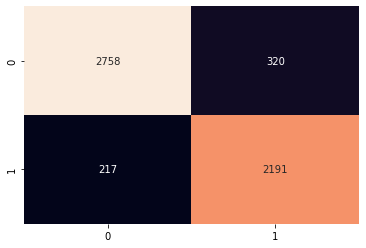

In [43]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3078
           1       0.87      0.91      0.89      2408

    accuracy                           0.90      5486
   macro avg       0.90      0.90      0.90      5486
weighted avg       0.90      0.90      0.90      5486



### Random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
pred = model2.predict(X_test)

In [47]:
pred

array([1, 0, 0, ..., 1, 0, 1])

In [48]:
score = metrics.accuracy_score(y_test, pred)

In [49]:
score

0.9352898286547575

In [50]:
cm = metrics.confusion_matrix(y_test, pred)

In [51]:
cm

array([[2791,  287],
       [  68, 2340]])

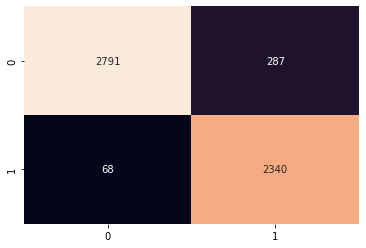

In [52]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      3078
           1       0.89      0.97      0.93      2408

    accuracy                           0.94      5486
   macro avg       0.93      0.94      0.93      5486
weighted avg       0.94      0.94      0.94      5486



### LSTM

In [54]:
input_data

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [55]:
voc_size=5000

In [56]:
onehot_repr=[one_hot(words,voc_size)for words in input_data] 
onehot_repr

[[3803, 3310, 2186, 476, 794, 3445, 4795, 4930, 4531, 3875],
 [415, 375, 4747, 279, 1037, 1170, 1702],
 [925, 250, 1623, 4960],
 [263, 4553, 4052, 2213, 2103, 4186],
 [882, 1037, 1653, 4751, 1377, 1200, 1037, 453, 2474, 3899],
 [3231,
  2102,
  2532,
  933,
  2813,
  1100,
  245,
  3258,
  2268,
  3052,
  4807,
  1432,
  799,
  4319,
  1702],
 [1906, 891, 411, 198, 4573, 4162, 1935, 1343, 2413, 2588, 2717],
 [2253, 3024, 2560, 2119, 1084, 3976, 1100, 51, 2413, 2588, 2717],
 [4612, 834, 416, 1489, 190, 1591, 2667, 269, 1100, 3589],
 [2675, 346, 412, 3776, 880, 4592, 807, 1262],
 [1120, 422, 2164, 3005, 318, 4713, 4017, 4959, 4678, 3832, 3894],
 [2213, 717, 794, 1591, 1100, 1084],
 [2190, 3629, 1459, 1658, 1581, 1459, 4259, 318, 1923],
 [2061, 1779, 4754, 4306, 1580, 1946, 2998, 2413, 2588, 2717],
 [3350, 3473, 3947, 3347, 2, 2413, 2588, 2717],
 [530, 345, 2280, 4661, 2493, 4932, 3741, 4035, 1657, 2082],
 [3105, 1400, 375],
 [3913, 3731, 2562, 4635, 1100, 3169, 897, 1702],
 [192, 2023, 4

In [57]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4930 4531 3875]
 [   0    0    0 ... 1037 1170 1702]
 [   0    0    0 ...  250 1623 4960]
 ...
 [   0    0    0 ... 2413 2588 2717]
 [   0    0    0 ... 1398 3354 2872]
 [   0    0    0 ...   85  333 4079]]


In [58]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3803,
       3310, 2186,  476,  794, 3445, 4795, 4930, 4531, 3875], dtype=int32)

In [59]:
# embedding_vector_features=40
# model3=Sequential()
# model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model3.add(LSTM(100))
# model3.add(Dense(1,activation='sigmoid'))
# model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# print(model3.summary())

In [60]:
len(embedded_docs),y.shape

(18285, (18285,))

In [61]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [62]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=101)

In [64]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model3=Sequential()
model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model3.add(Dropout(0.3))
model3.add(LSTM(100))
model3.add(Dropout(0.3))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
# model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

In [66]:
model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
200/200 [==============================] - 10s 37ms/step - loss: 0.3347 - accuracy: 0.8476 - val_loss: 0.1883 - val_accuracy: 0.9182
Epoch 2/10
200/200 [==============================] - 8s 38ms/step - loss: 0.1530 - accuracy: 0.9383 - val_loss: 0.1792 - val_accuracy: 0.9222
Epoch 3/10
200/200 [==============================] - 7s 35ms/step - loss: 0.1156 - accuracy: 0.9550 - val_loss: 0.1855 - val_accuracy: 0.9216
Epoch 4/10
200/200 [==============================] - 7s 33ms/step - loss: 0.0914 - accuracy: 0.9674 - val_loss: 0.2134 - val_accuracy: 0.9183
Epoch 5/10
200/200 [==============================] - 7s 33ms/step - loss: 0.0690 - accuracy: 0.9763 - val_loss: 0.2298 - val_accuracy: 0.9172
Epoch 6/10
200/200 [==============================] - 7s 33ms/step - loss: 0.0541 - accuracy: 0.9816 - val_loss: 0.2613 - val_accuracy: 0.9194
Epoch 7/10
200/200 [==============================] - 6s 32ms/step - loss: 0.0374 - accuracy: 0.9877 - val_loss: 0.3261 - val_accuracy: 0.917

In [83]:
# y_pred=model3.predict_classes(X_test)
y_pred=model3.predict(X_test)

In [84]:
y_pred

array([[9.7121179e-01],
       [1.8007971e-09],
       [1.2495798e-05],
       ...,
       [9.9341965e-01],
       [5.5565986e-05],
       [9.9997622e-01]], dtype=float32)

In [85]:
classes_x=np.argmax(y_pred,axis=1)

In [86]:
classes_x

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
y_pred

array([[9.7121179e-01],
       [1.8007971e-09],
       [1.2495798e-05],
       ...,
       [9.9341965e-01],
       [5.5565986e-05],
       [9.9997622e-01]], dtype=float32)

In [88]:
y_test

array([1, 0, 0, ..., 1, 0, 1])

In [89]:
cm = metrics.confusion_matrix(y_test, y_pred)

ValueError: ignored

In [90]:
cm

array([[2791,  287],
       [  68, 2340]])

In [91]:
cm = metrics.confusion_matrix(y_test, classes_x)

In [92]:
cm

array([[3078,    0],
       [2408,    0]])

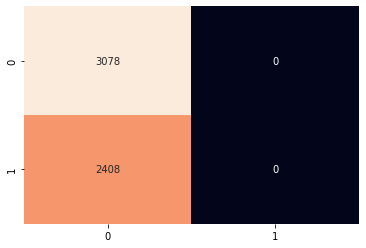

In [93]:
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      3078
           1       0.00      0.00      0.00      2408

    accuracy                           0.56      5486
   macro avg       0.28      0.50      0.36      5486
weighted avg       0.31      0.56      0.40      5486



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,classes_x)

0.5610645278891725

### Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    "criterion":['gini','entropy'],
    "n_jobs":["fit", "predict","decision_path"]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2592 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2592 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 968, in __call__
    n_jobs = self._initialize_backend()
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

TypeError: ignored

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()


grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
    "criterion":['gini','entropy'],
    "n_jobs":["fit", "predict","decision_path"]
}

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train, y_train)

# summarize results
# print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
# means = grid_search_forest.cv_results_['mean_test_score']
# stds = grid_search_forest.cv_results_['std_test_score']
# params = grid_search_forest.cv_results_['params']

# for mean, stdev, param in zip(means, stds, params):
#     print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 864 candidates, totalling 1728 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1728 fits failed out of a total of 1728.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1728 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 968, in __call__
    n_jobs = self._initialize_backend()
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

TypeError: ignored